In [3]:
import cv2
import imutils
from PIL import Image
from src.aruco_marker import ArucoMarker

In [4]:
img = cv2.imread('./../datasets/images/distance_detection/8.jpeg')
img = imutils.resize(img, width=600)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)

In [6]:
marker_perimeter_in_cm = 4 * 7
marker = ArucoMarker(cv2.aruco.DICT_5X5_50, gray, marker_perimeter_in_cm)

In [7]:
print("ArUco Perimeter: {}".format(marker.get_perimeter()))
print("Pixels per centimeter: {}".format(marker.get_pixels_per_centimeter()))

print("Width in px: {}".format(marker.get_width()))
print("Width in cm: {}".format(marker.get_width_in_cm()))
print("Height in px: {}".format(marker.get_height()))
print("Height in cm: {}".format(marker.get_height_in_cm()))

ArUco Perimeter: 1093.0127563476562
Pixels per centimeter: 39.03616986955915
Width in px: 273.00183149568795
Width in cm: 6.993560905384262
Height in px: 275.00727263110696
Height in cm: 7.044934827111733


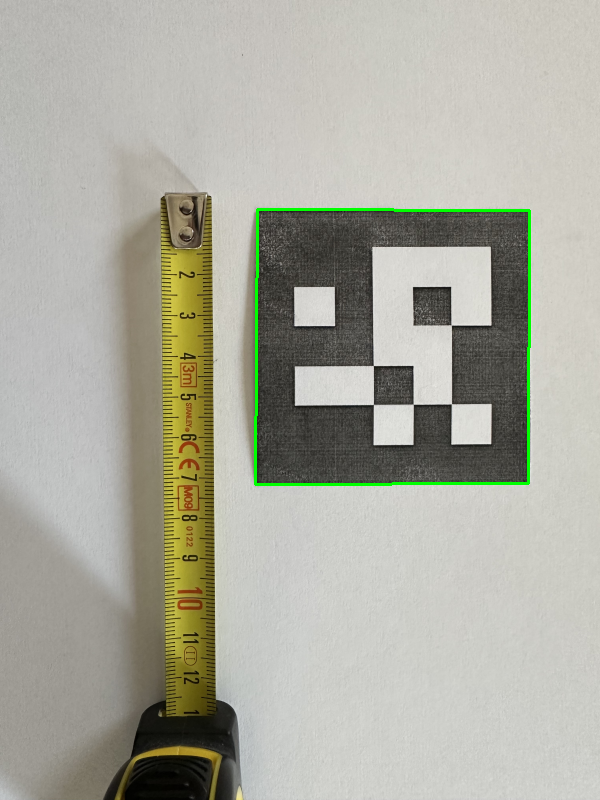

In [8]:
# draw the bounding box of the ArUCo detection
cv2.line(img, marker.top_left, marker.top_right, (0, 255, 0), 2)
cv2.line(img, marker.top_right, marker.bottom_right, (0, 255, 0), 2)
cv2.line(img, marker.bottom_right, marker.bottom_left, (0, 255, 0), 2)
cv2.line(img, marker.bottom_left, marker.top_left, (0, 255, 0), 2)

# show the output img    
preview = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # Converting BGR to RGB
display(Image.fromarray(preview))